# Bank Marketing Campaign
### Alyssa Hubiak and Nasibul Hossain

Project Goal: Develop a model to predict whether a customer is likely to buy the bank's product or not. This
will help ABC Bank determine where to focus their marketing for their new term deposit
product. This will need to be a binary classification model to predict whether the customer will
subscribe (1) or not (0).

The project will be broken down into several steps:
* Initialization
* Data Understanding and Preparation
* Exploratory Data Analysis
* Model Building and Selection
* Conclusion and Final Recommendations


## Initialization

In [69]:
#reading in necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading in data
bank_data = pd.read_csv('bank-additional-full.csv', sep=';')
#displaying first several rows
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can see that our dataset is made up of 20 features columns and a single target column. The columns are a mix of numeric and categorical variables. We can now examine our data for cleaning and preparation for use in models.

## Data Understanding and Preparation

In [3]:
#viewing overall dataset info
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It appears that we have a total of 41188 rows, with no apparent missing values. Our data types appear to match the column expectations. We will now confirm that there are no missing values by counting null values. 

In [4]:
#finding count of all null values by column. 
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We can see that there are no missing values which will need to be addressed at this time. We will now begin our column-based examination of our data for skew and potential outliers.

## Exploratory Data Analysis

### Examination of Data by Column

#### Age

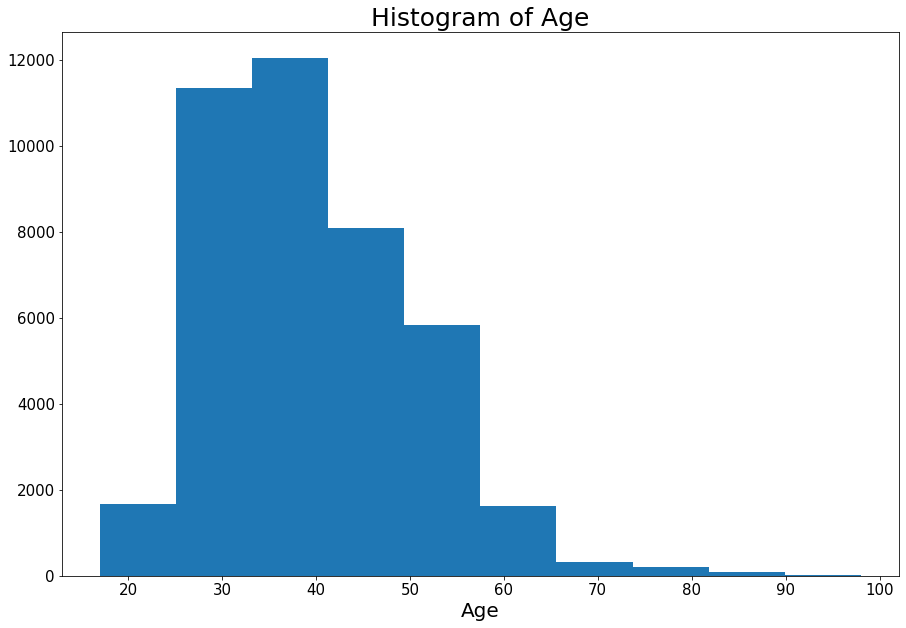

In [5]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['age'])
plt.title('Histogram of Age', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age', fontsize=20)
plt.show()

#### Job               

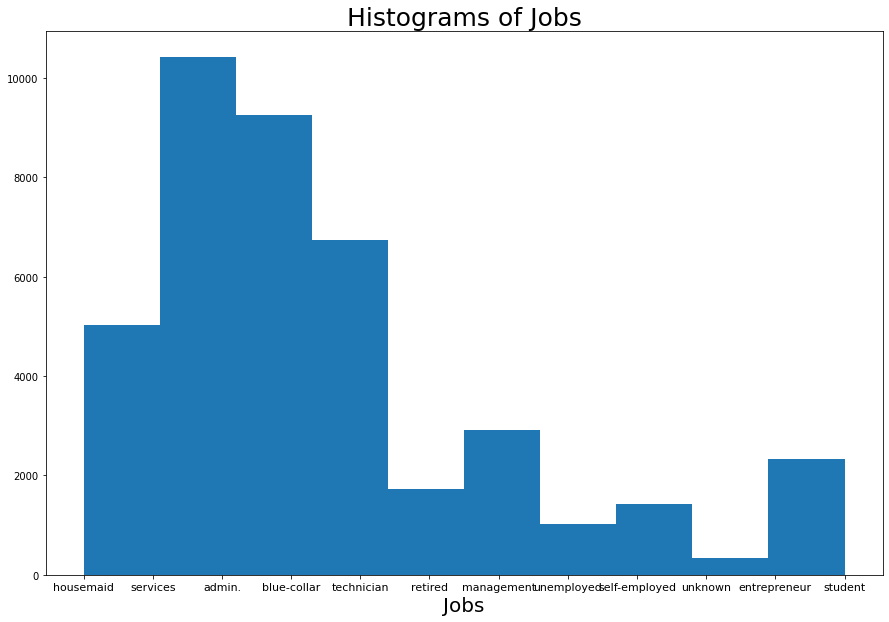

In [6]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['job'])
plt.title('Histograms of Jobs', fontsize=25)
plt.xlabel('Jobs', fontsize=20)
plt.xticks(fontsize=11)
plt.show()

#### Marital              

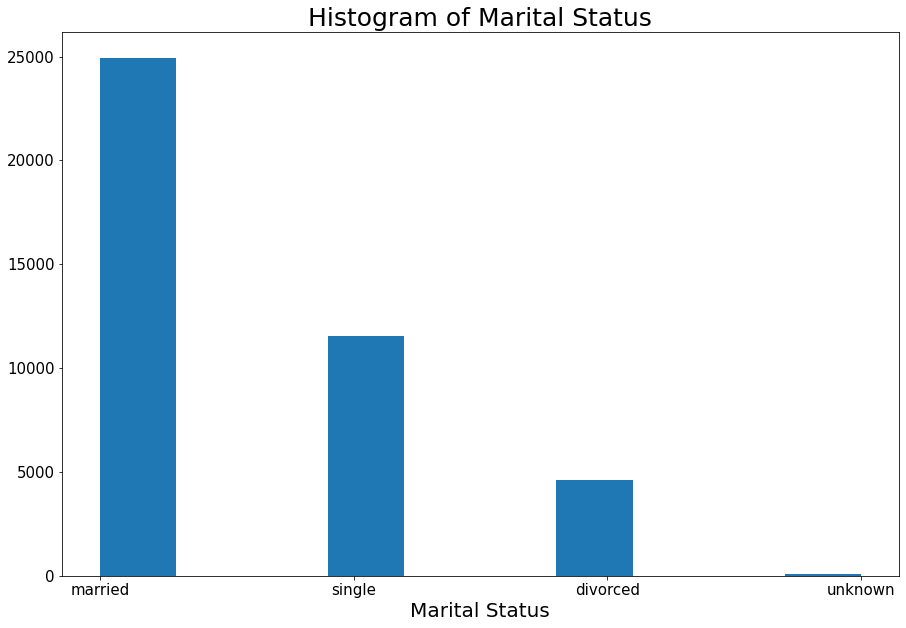

In [7]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['marital'])
plt.title('Histogram of Marital Status', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Marital Status', fontsize=20)
plt.show()

#### Education

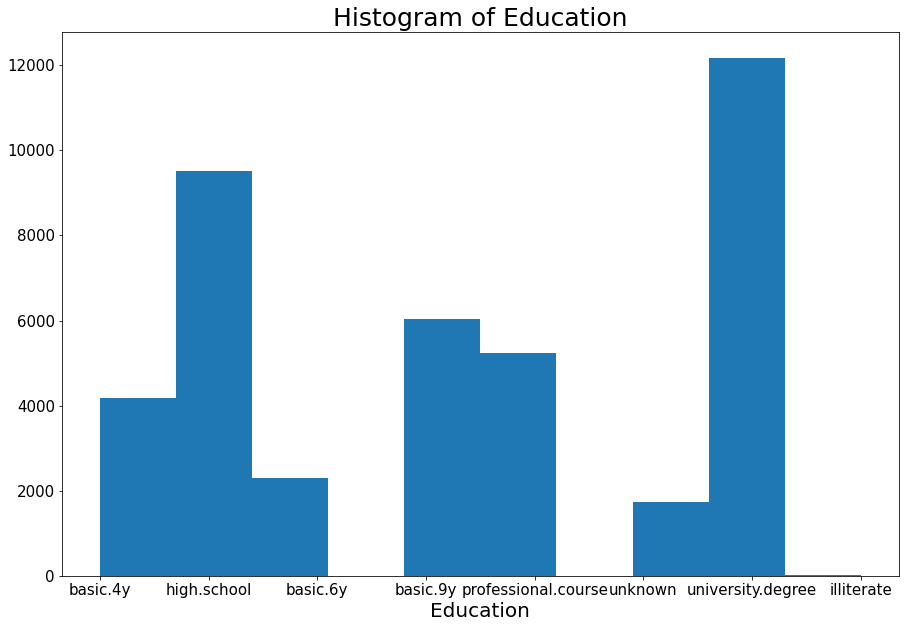

In [8]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['education'])
plt.title('Histogram of Education', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Education', fontsize=20)
plt.show()

#### Default

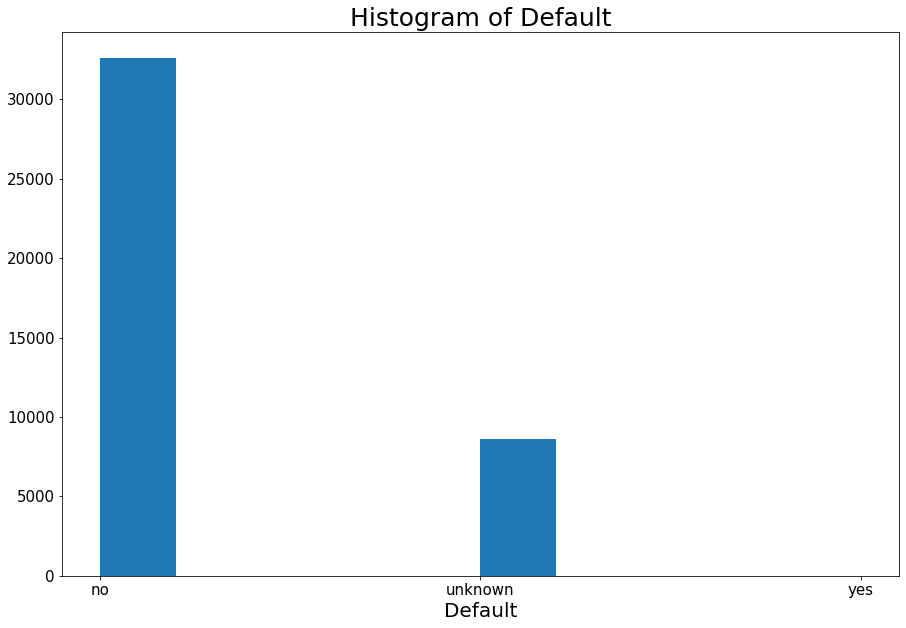

In [9]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['default'])
plt.title('Histogram of Default', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Default', fontsize=20)
plt.show()

#### Housing

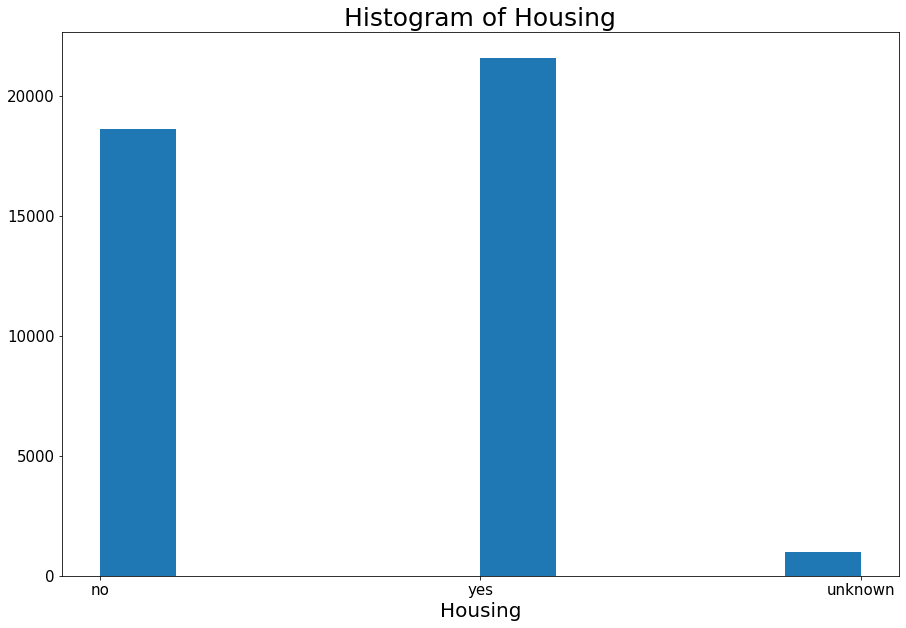

In [10]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['housing'])
plt.title('Histogram of Housing', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Housing', fontsize=20)
plt.show()

#### Loan (history of having a loan)

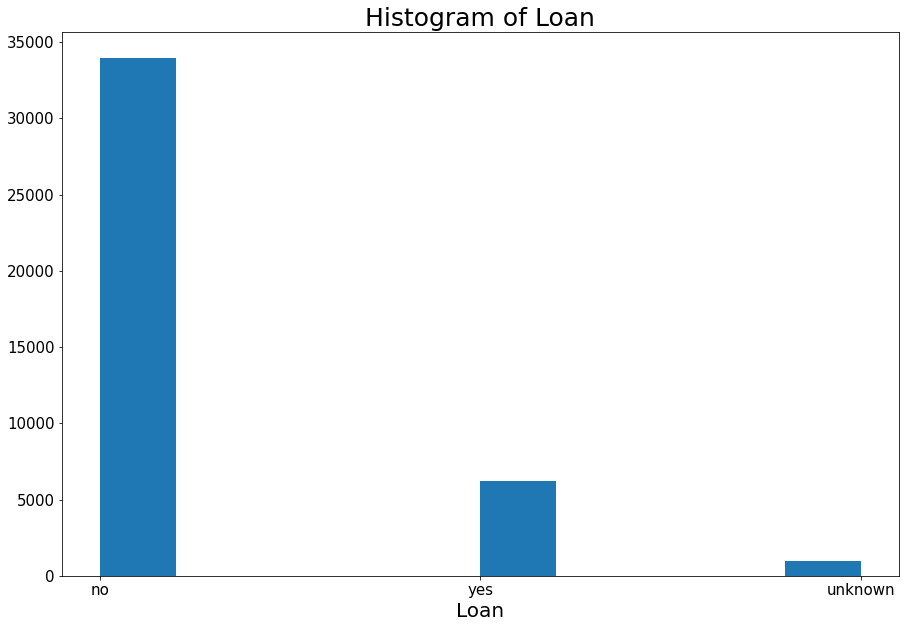

In [11]:
plt.figure(figsize=(15,10))
plt.hist(bank_data['loan'])
plt.title('Histogram of Loan', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Loan', fontsize=20)
plt.show()

#### Contact (cell vs telephone)

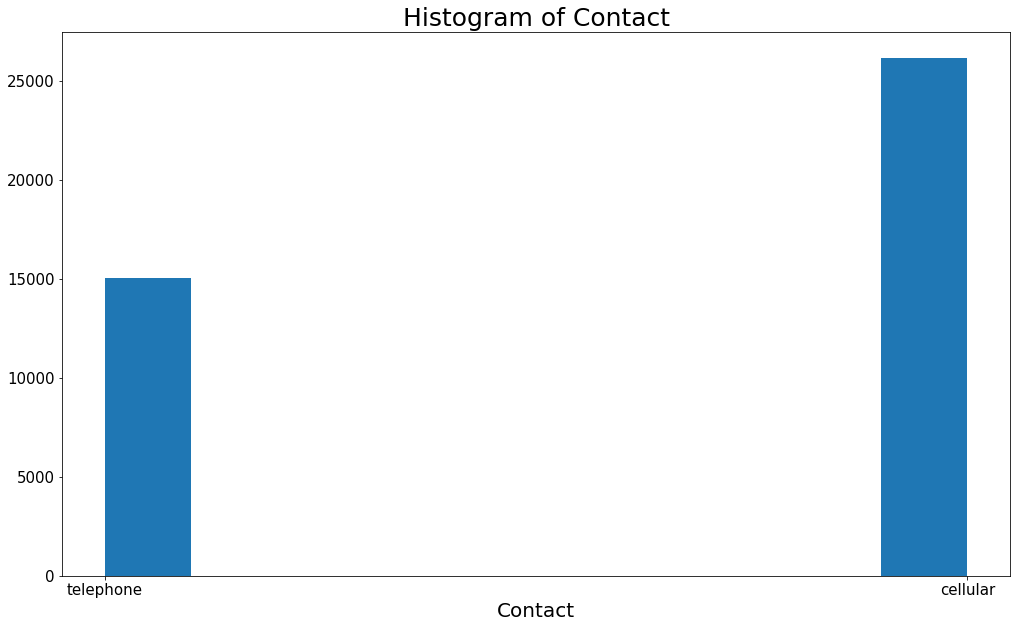

In [12]:
plt.figure(figsize=(17,10))
plt.hist(bank_data['contact'])
plt.title('Histogram of Contact', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Contact', fontsize=20)
plt.show()

#### Month

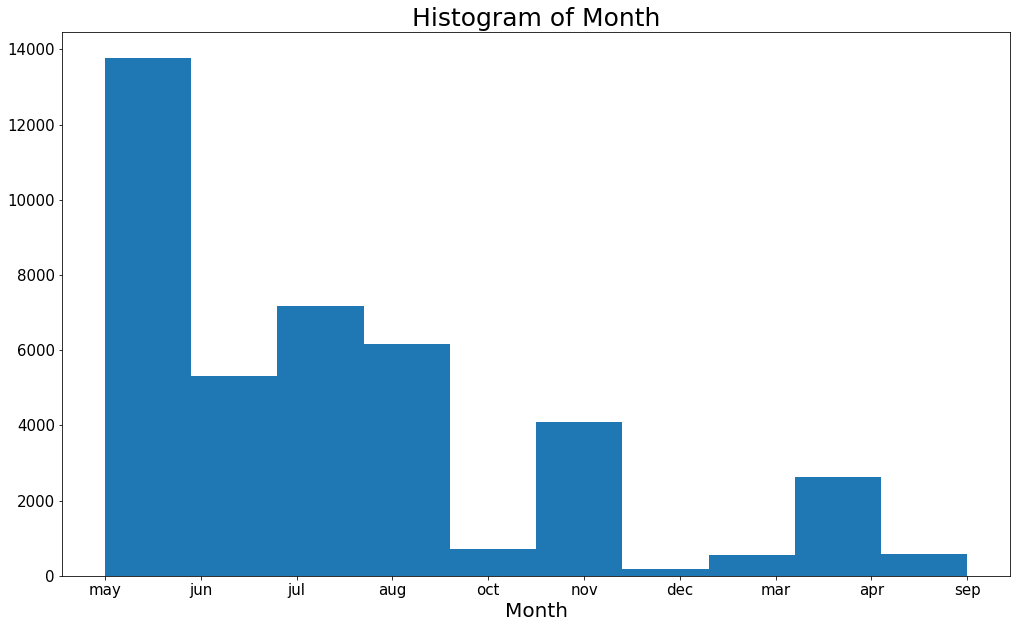

In [13]:
plt.figure(figsize=(17,10))
plt.hist(bank_data['month'])
plt.title('Histogram of Month', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month', fontsize=20)
plt.show()

#### Day of the Week

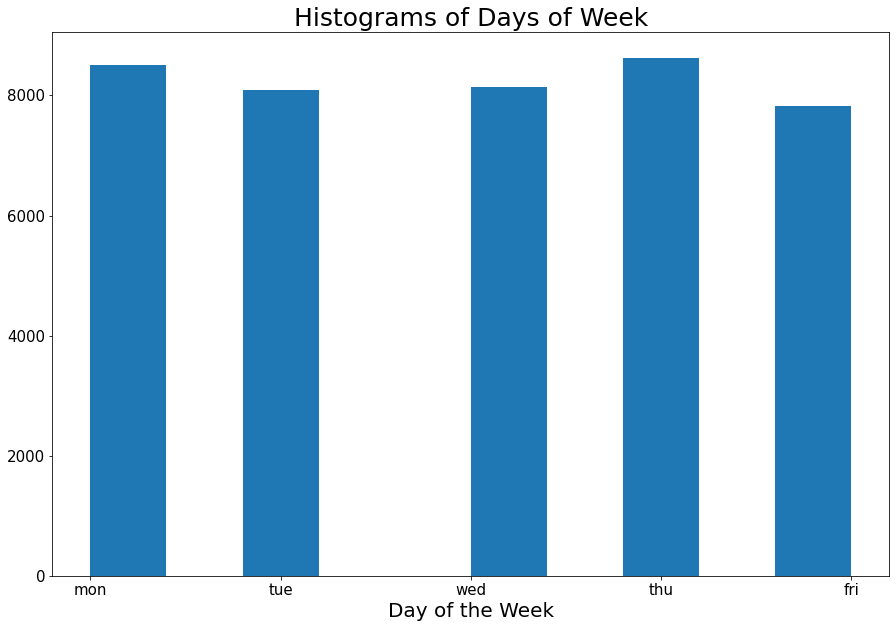

In [14]:
#examination of day_of_week column
plt.figure(figsize=(15,10))
plt.hist(bank_data['day_of_week'])
plt.title('Histograms of Days of Week', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Day of the Week', fontsize=20)
plt.show()

It appears that there each day of the week has a relatively similar number of calls; there is not a single day of the week which outperforms the others.

#### Call Duration

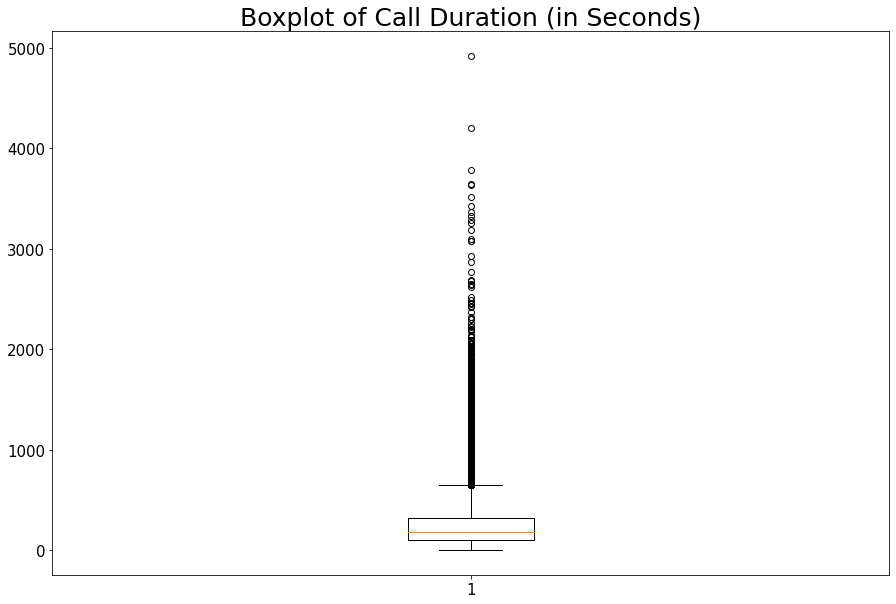

In [15]:
#creating boxplot of call duration
plt.figure(figsize=(15,10))
plt.boxplot(bank_data['duration'])
plt.title('Boxplot of Call Duration (in Seconds)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

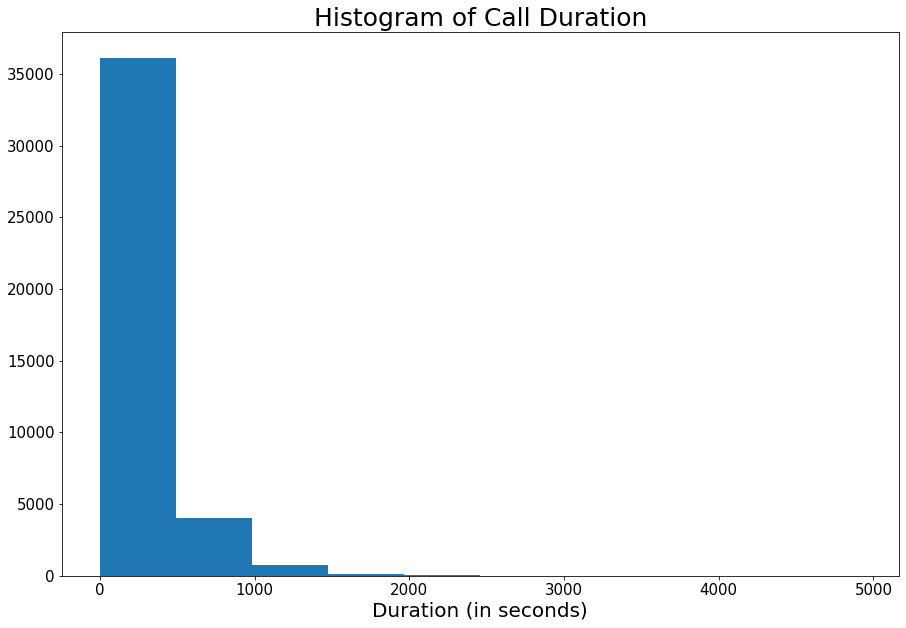

In [16]:
#creating histogram of call duration
plt.figure(figsize=(15,10))
plt.hist(bank_data['duration'])
plt.title('Histogram of Call Duration', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Duration (in seconds)', fontsize=20)
plt.show()

There are a significant number of outliers related to this column and it is right skewed. This is likely due to the majority of calls resulting in no term deposit subscription being close to zero, bringing down the average call time. This would typically need to be addressed prior to model creation, but due to the fact this variable is not known until after the call is completed, it will not be helpful in creating a accurate predictive model. Therefore this feature will be dropped from the dataset after exploration prior to model creation. 

#### Campaign (Number of contacts per client)

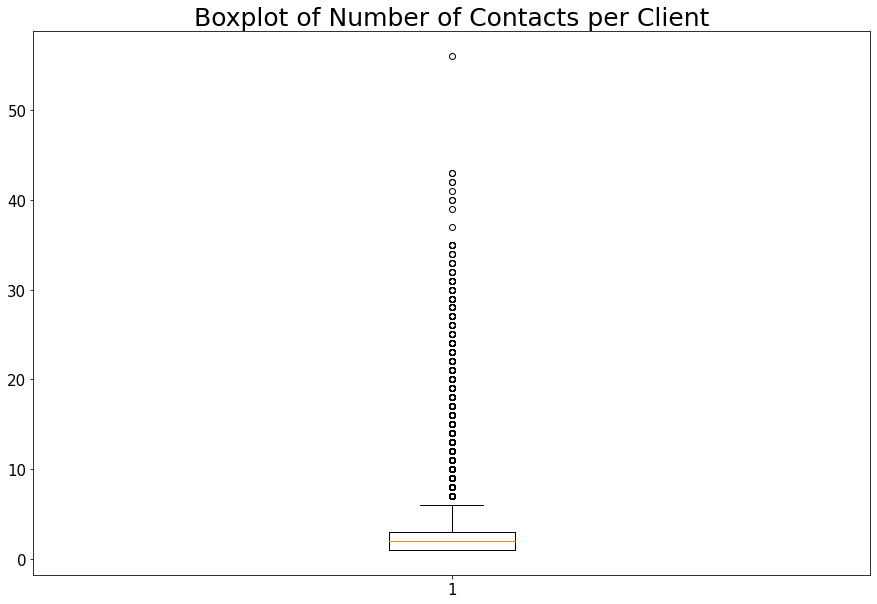

In [17]:
#creating boxplot of campaign
plt.figure(figsize=(15,10))
plt.boxplot(bank_data['campaign'])
plt.title('Boxplot of Number of Contacts per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

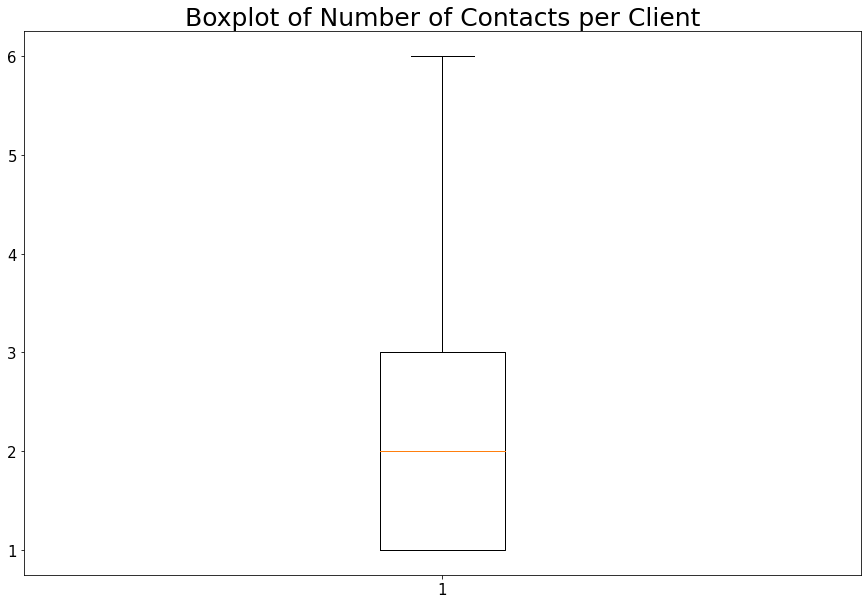

In [18]:
plt.figure(figsize=(15,10))
plt.boxplot(bank_data['campaign'], showfliers=False)
plt.title('Boxplot of Number of Contacts per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The median number of contacts are 2 while 75% of contacts were 3 or under.

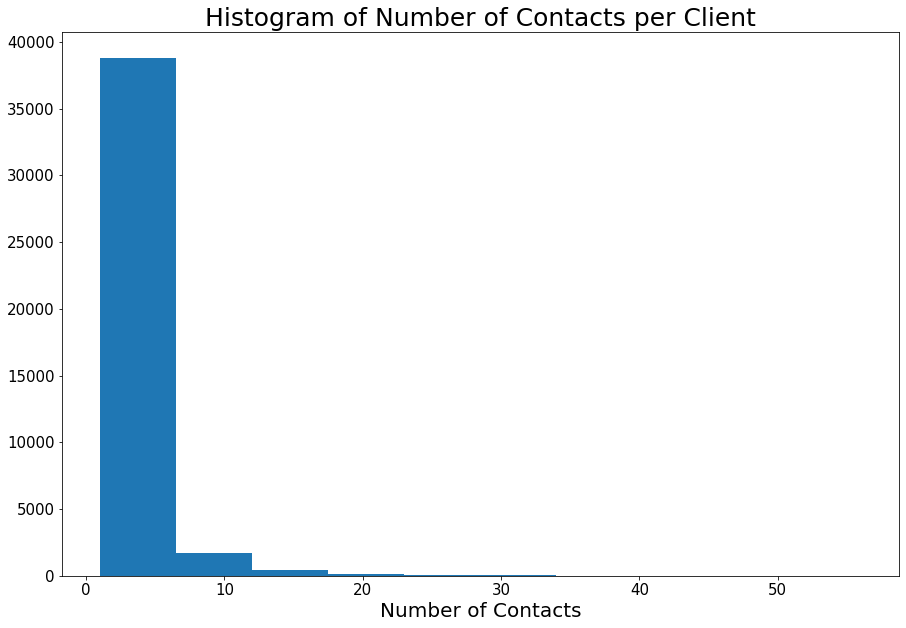

In [19]:
#creating histogram of campaign
plt.figure(figsize=(15,10))
plt.hist(bank_data['campaign'])
plt.title('Histogram of Number of Contacts per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Contacts', fontsize=20)
plt.show()

We can see a similar issue, with large numbers of outliers and righ-skewed data. It can be assumed that since this is likely due to the majority of customers being relatively new, since the values are a count of every time the client has been contacted. It may be worth further exploration into length of time a client has been with the company to see if this has a greater effect on our predictions. 

#### Pdays (Number of days since last contact of previous campaign)
It is important to note that a client which has not been contacted previously will have a pday value of 999. This will make it difficult to interpret a boxplot due to the large spread. Therefore a histogram will be utilized to better examine the data.

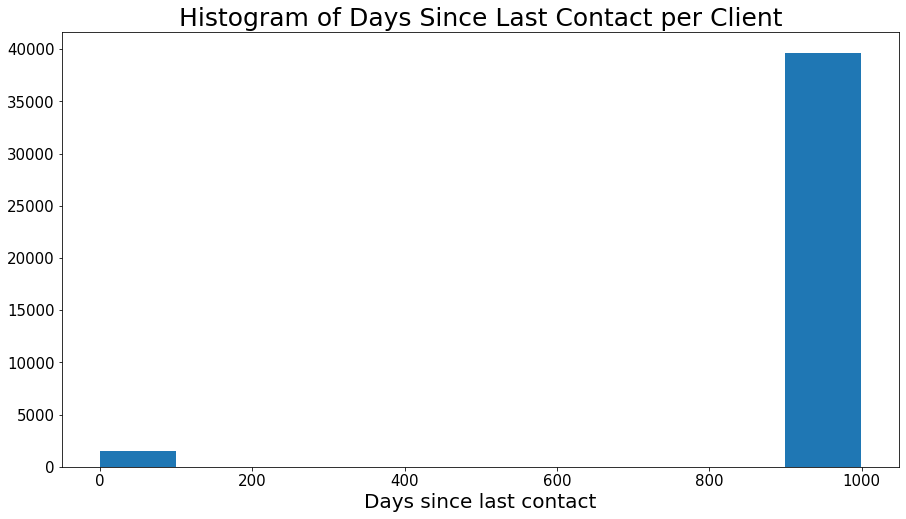

In [36]:
#creating histogram of pdays
plt.figure(figsize=(15,8))
plt.hist(bank_data['pdays'])
plt.title('Histogram of Days Since Last Contact per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Days since last contact', fontsize=20)
plt.show()

As expected, the majority of clients fall into the category of never being contacted, and thus have a value of 999. We will take a closer look at those who have been contacted previously by adjusting our limits. 

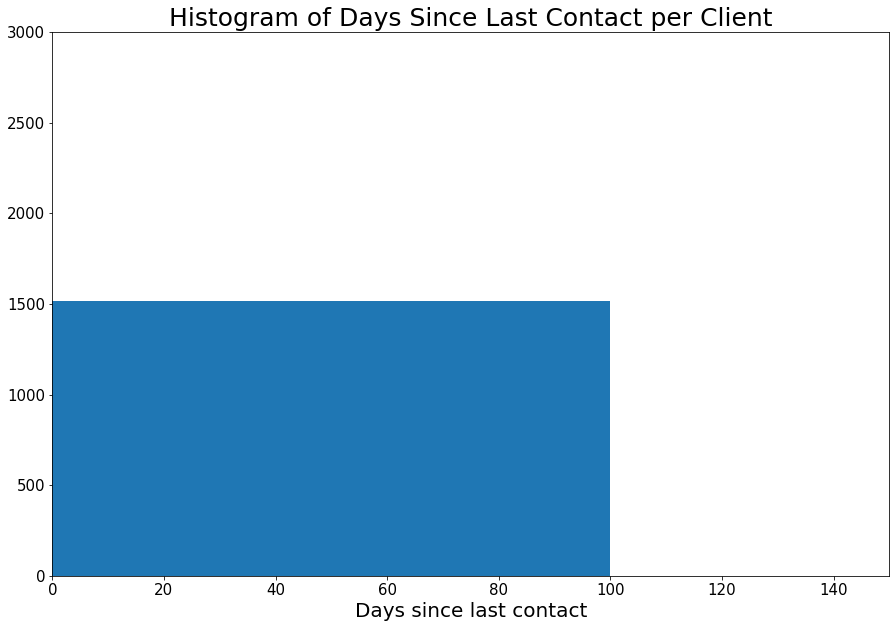

In [21]:
#creating histogram of pdays -previously contacted
plt.figure(figsize=(15,10))
plt.hist(bank_data['pdays'])
plt.title('Histogram of Days Since Last Contact per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Days since last contact', fontsize=20)
plt.xlim(0,150)
plt.ylim(0, 3000)
plt.show()

It appears that all the customers that have been contacted fall within the previously 100 days.

#### Previous (Total number of contacts from previous campaign)

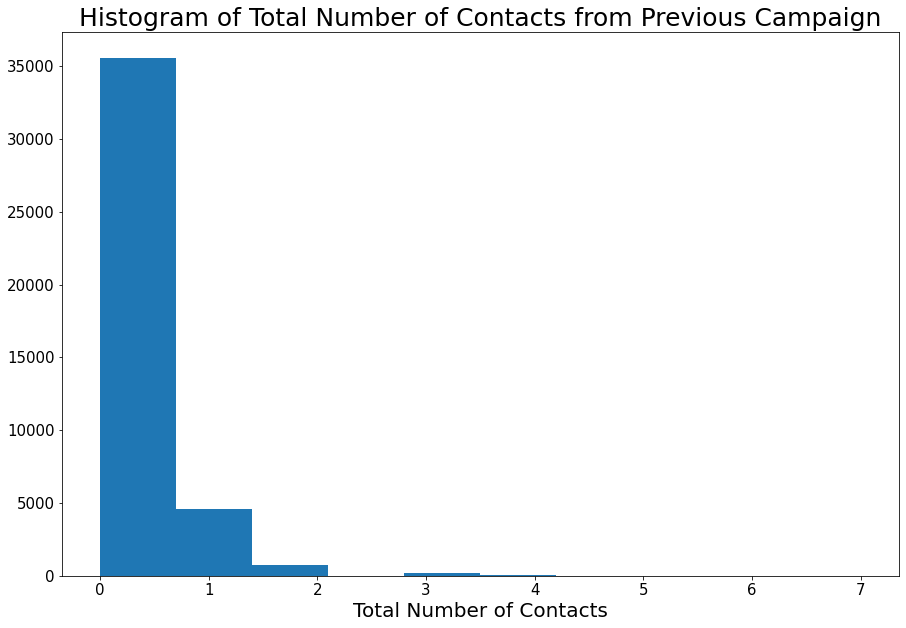

In [22]:
#creating histogram of previous
plt.figure(figsize=(15,10))
plt.hist(bank_data['previous'])
plt.title('Histogram of Total Number of Contacts from Previous Campaign', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total Number of Contacts', fontsize=20)
plt.show()

As expected based on our previous column, there are a large number of clients which have never been contacted prior, resulting in a right-skewed data set.

#### POutcome (Outcome of previous campaign)

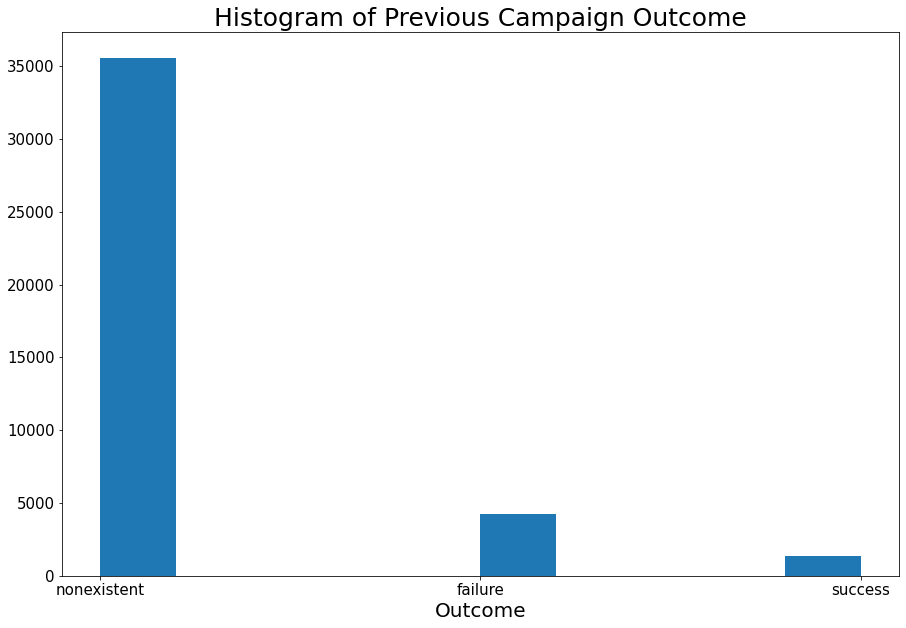

In [23]:
#creating histogram of poutcome
plt.figure(figsize=(15,10))
plt.hist(bank_data['poutcome'])
plt.title('Histogram of Previous Campaign Outcome', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Outcome', fontsize=20)
plt.show()

In [24]:
bank_data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

As we have so many new clients in this dataset, the majority of this column is nonexistent. However, we can see that the majority of the contacts were a failure, at 4252 failures compared to only 1373 successes.

We will now examine the social and economic context attributes

#### Emp.Var.Rate (employment variation rate - quarterly indicator)

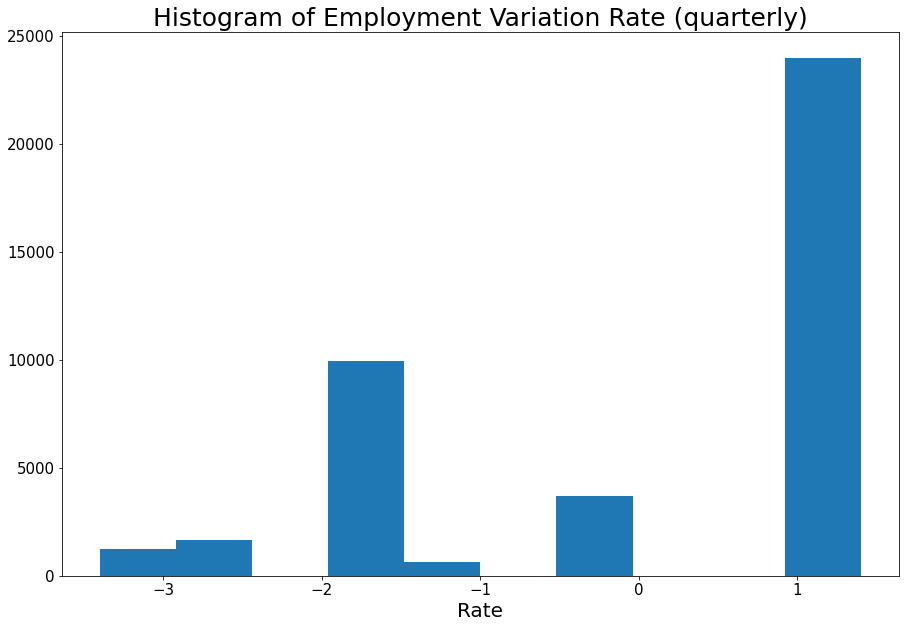

In [25]:
#creating histogram of emp.var.rate
plt.figure(figsize=(15,10))
plt.hist(bank_data['emp.var.rate'])
plt.title('Histogram of Employment Variation Rate (quarterly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate', fontsize=20)
plt.show()

#### Cons.Price.Idx (consumer price index - monthly indicator)

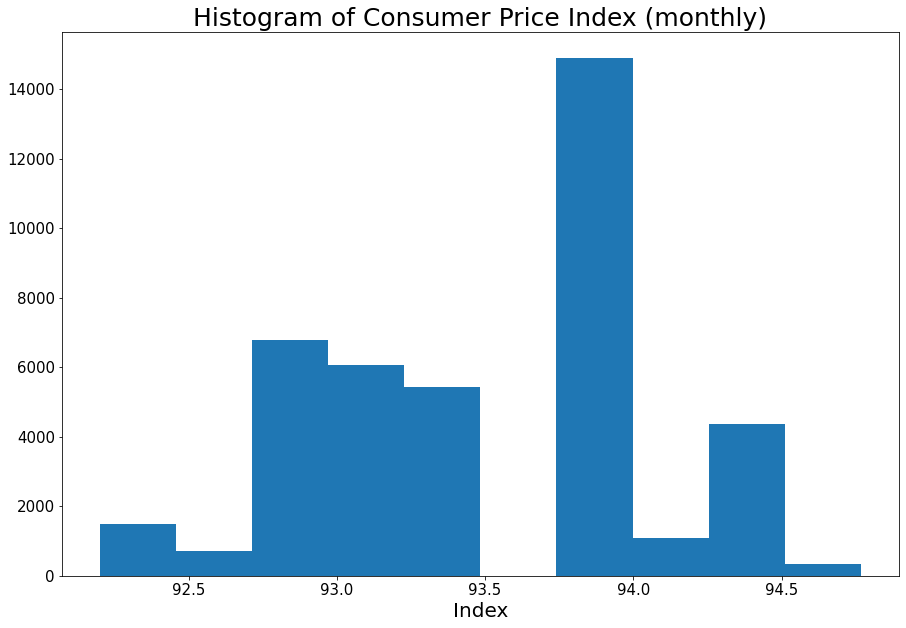

In [26]:
#creating histogram of cons.price.idx
plt.figure(figsize=(15,10))
plt.hist(bank_data['cons.price.idx'])
plt.title('Histogram of Consumer Price Index (monthly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Index', fontsize=20)
plt.show()

#### Cons.Conf.Idx (consumer confidence index - monthly indicator)

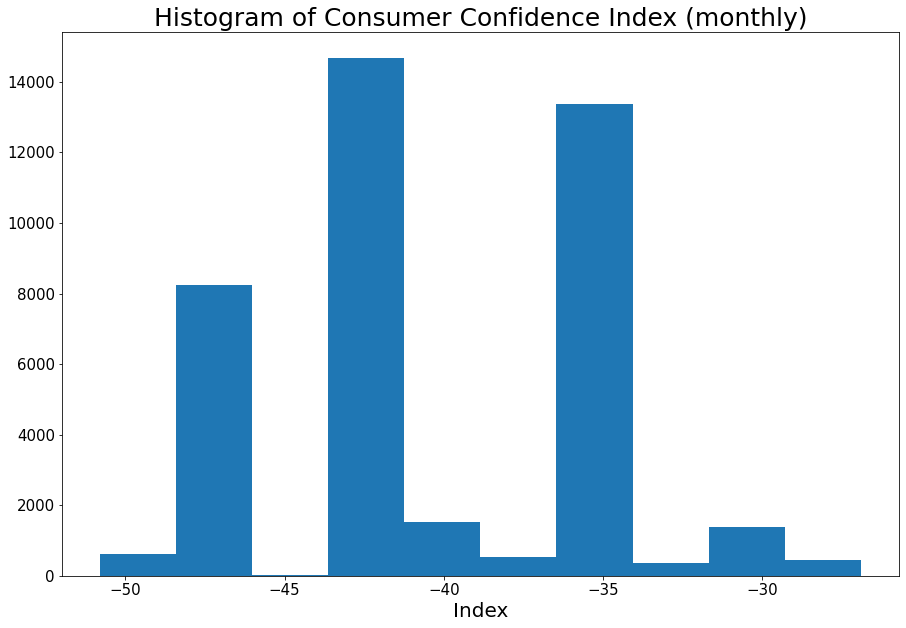

In [27]:
#creating histogram of cons.conf.idx
plt.figure(figsize=(15,10))
plt.hist(bank_data['cons.conf.idx'])
plt.title('Histogram of Consumer Confidence Index (monthly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Index', fontsize=20)
plt.show()

#### Euribor3m (euribor 3 month rate - daily indicator)

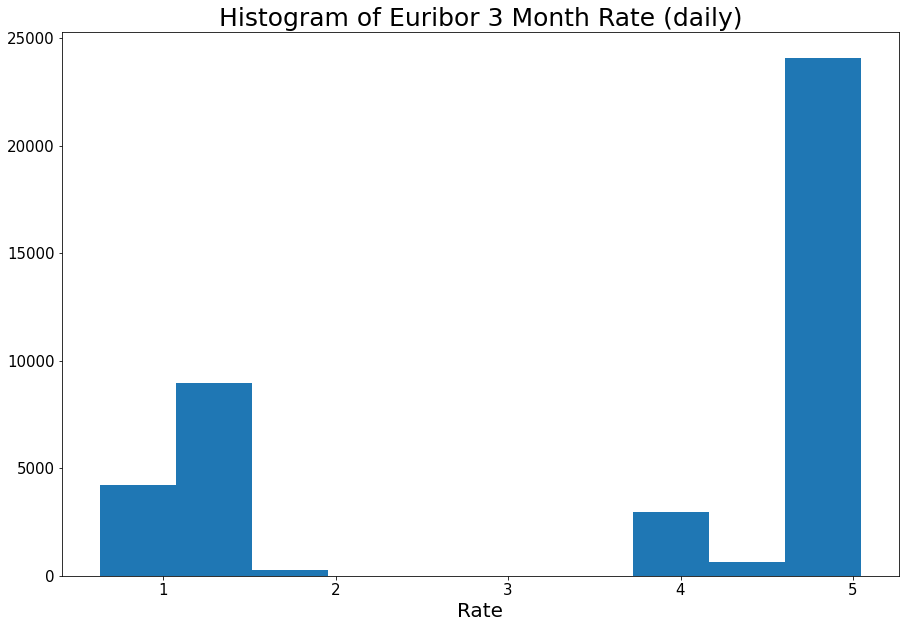

In [28]:
#creating histogram of euribor3m
plt.figure(figsize=(15,10))
plt.hist(bank_data['euribor3m'])
plt.title('Histogram of Euribor 3 Month Rate (daily)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate', fontsize=20)
plt.show()

#### Nr.Employed (number of employees - quarterly indicator)

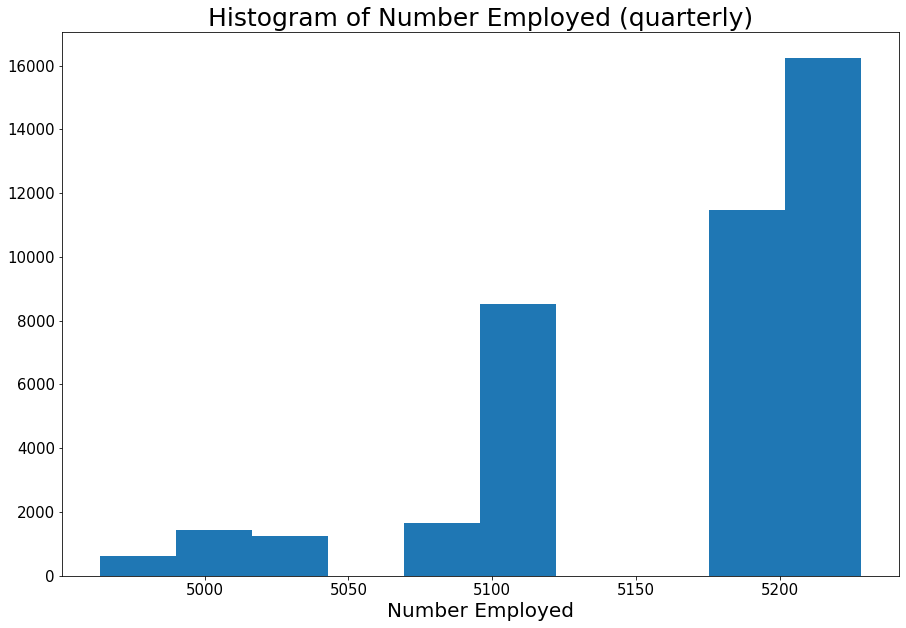

In [29]:
#creating histogram of nr.employed
plt.figure(figsize=(15,10))
plt.hist(bank_data['nr.employed'])
plt.title('Histogram of Number Employed (quarterly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number Employed', fontsize=20)
plt.show()

Overall, all of our social and economic data shows no significant evidence for skew or outliers which will need to be addressed.

#### Y (Whether client subsribed to new term deposit)

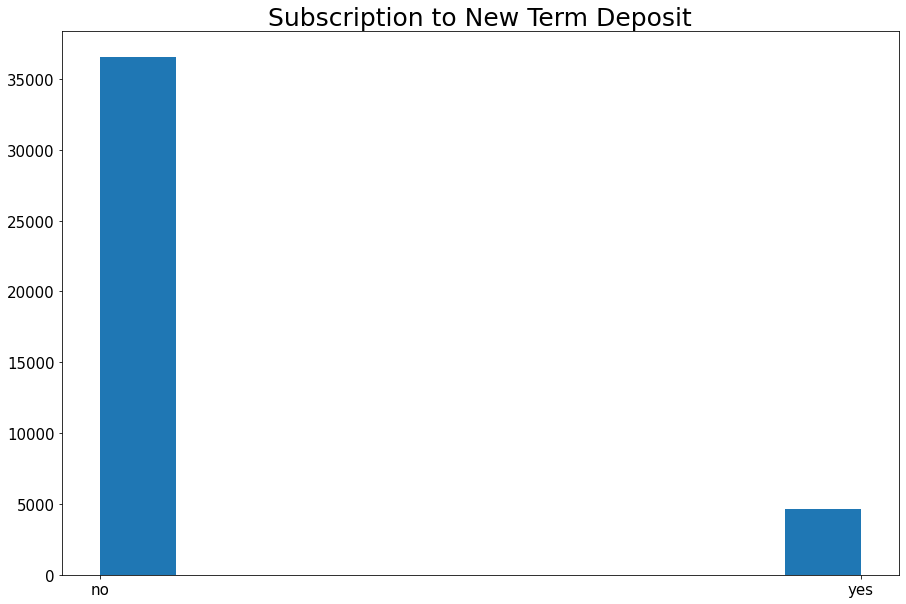

In [30]:
#creating histogram of y
plt.figure(figsize=(15,10))
plt.hist(bank_data['y'])
plt.title('Subscription to New Term Deposit', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [31]:
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Our value count shows a clear class imbalance with approximately 89% of users not subscribing to the term deposit. This may result in issues later on in our model creation, and will need to be addressed. First, we will change this column to a bool value, and change the name to a more recognizable column name of "subscribed".

In [32]:
bank_data['subscribed'] = pd.Series(map(lambda x: dict(yes=1, no=0)[x], bank_data.y.values.tolist()), bank_data.index)
bank_data.drop(columns='y', inplace=True)

In [33]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Now we will examine the correlation matrix of our numeric data and target to see if there are any strong correlations between our columns.

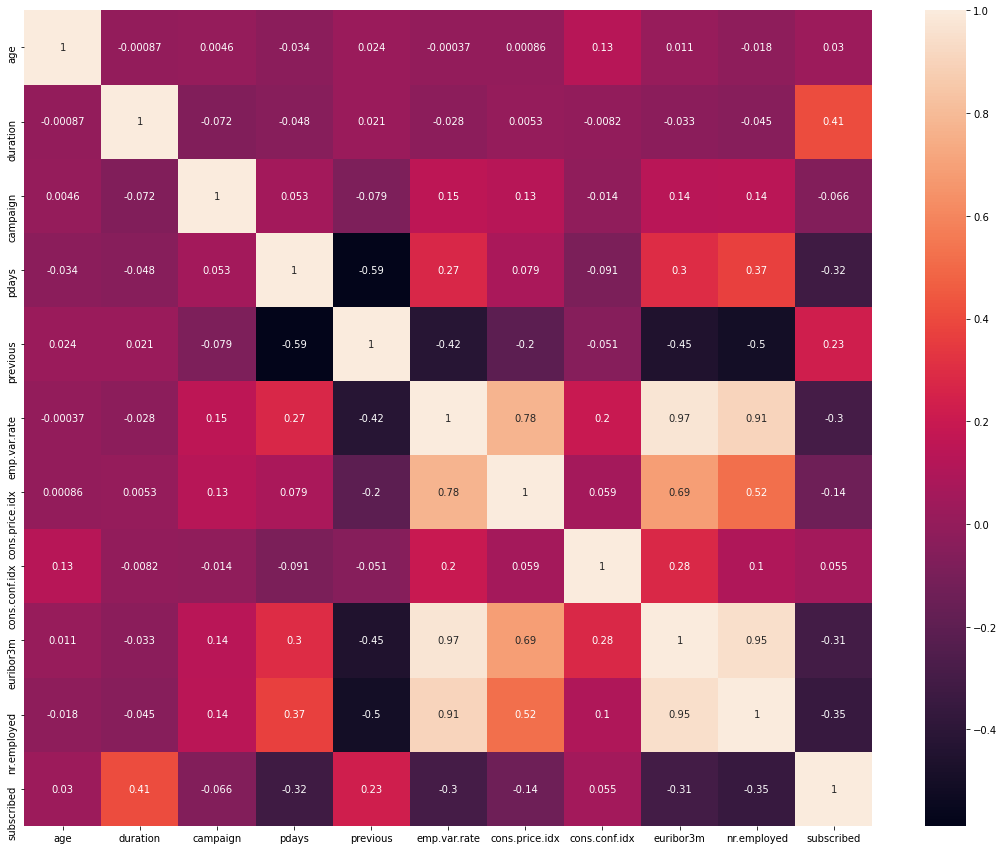

In [34]:
corr_matrix = bank_data.corr()
plt.figure(figsize=(19,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see that there is no significant correlation between any of our columns and our target. We can see that there is significant correlation between our economic variables, which is to be expected as they are all based on current economic trends. We will also examine a scatter matrix of this data.

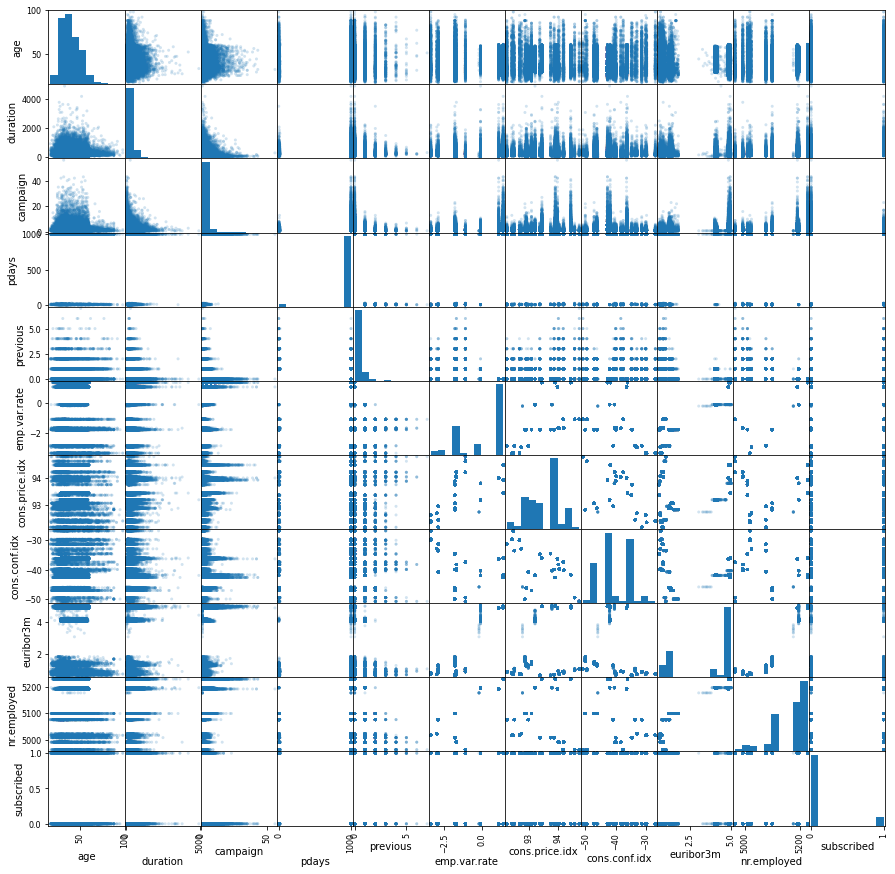

In [35]:
pd.plotting.scatter_matrix(bank_data, alpha=0.2, figsize=(15,15))
plt.show()